##  Machine Learning 
### Simple linear regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
with open('../data/stock_data.pkl', 'rb') as handle:
    stock_data = pickle.load(handle)

with open('../data/benchmark_data.pkl', 'rb') as handle:
    benchmarks = pickle.load(handle)

### Estimar la $\beta$ del modelo CAPM

El modelo CAPM dice en equilibrio el retorno esperado de un activo de riesgo es 

$E(R_i) = R_f + \beta_i(R_m - R_f)$

Donde la $\beta_i$ corresponde a una prima ajustada al riesgo de mercado de dicho activo.
Esta $\beta_i$ podemos estimarla como una tarea de regresión lineal simple a partir de los
rendimientos de un índice de mercado y del activo en cuestión. Por simplicidad, dado la circunstancia de tipos de interés asumiremos $R_f=0.0$

___


### Ejemplo 

Seires OHLC de Telefonica y el IBEX

In [4]:
tef_data = stock_data['TEF'].loc['2019-01-02':]
ibex_data = benchmarks['ibex'].loc['2019-01-02':]

In [5]:
tef_ret = np.log(tef_data.close).diff()
ibex_ret = np.log(ibex_data.close).diff()

In [6]:
print(tef_ret.shape)
print(ibex_ret.shape)

(111,)
(111,)


#### Regresión Lineal con sklearn


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X = ibex_ret.dropna().values.reshape(-1,1) 
Y = tef_ret.dropna().values.reshape(-1,1)

In [9]:
lmodel = LinearRegression()
lmodel.fit(X, Y)

LinearRegression()

La Beta corresponde al coeficiente de la regresión

In [10]:
beta = lmodel.coef_[0][0]
beta

0.8628558460627037

Nube de puntos y linea de regresión correspondiente

In [11]:
ptos_x = np.array([np.min(X)*1.2, np.max(X)*1.2])
ptos_y = beta*ptos_x

In [12]:
ptos_y

array([-0.01866657,  0.02573539])

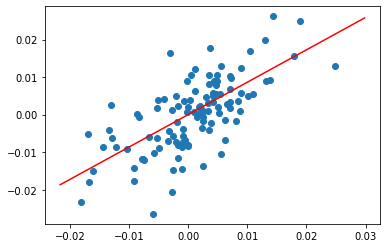

In [13]:
plt.scatter(X,Y)
plt.plot(ptos_x, ptos_y, 'r')

La función score devuelve el R^2

In [14]:
r_sqr = lmodel.score(X,Y)
r_sqr

0.46725096229628504

R^2 ajustado

In [15]:
adj_r_sqr = 1 - (1-lmodel.score(X, Y))*(Y.shape[0]-1)/(Y.shape[0]-X.shape[1]-1)
adj_r_sqr

0.4623181008360655

Gráfica de los residuos

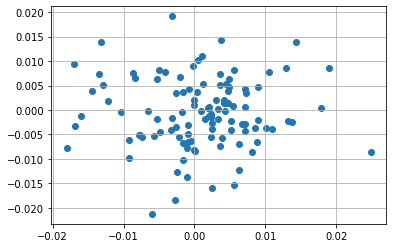

In [16]:
Y_hat = beta * X
res = Y - Y_hat
plt.scatter(X, res)
plt.grid()